In [ ]:
!git clone http://github.com/Zapy67/ATML-PA-4 test

In [ ]:
!git pull http://github.com/Zapy67/ATML-PA-4 test

In [ ]:
%cd test

In [ ]:
!ls

#  FedSGD vs Centralized SGD (Theoretical Equivalence)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# !pip install fedlab

In [ ]:
import fed_lib
import importlib
importlib.reload(fed_lib)

In [ ]:
from fed_lib import fed_methods, fed_model, utils
importlib.reload(fed_methods)
importlib.reload(fed_model)
importlib.reload(utils)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
client_weights = [0.2] * 5
domains = [0.2] * 5

In [ ]:
fed = fed_model.Federation(num_clients=5, federate_method=fed_methods.FedSGD(client_weights=client_weights), domains=domains, partition="dirichlet", alpha=10000,device=device, batch_size=64, pin_memory=True, num_workers=2)

In [ ]:
fed.train(40, lr=15e-3, verbose=False, train_central=True)

In [ ]:
import matplotlib.pyplot as plt
def plot_fed_vs_central_acc(metrics, title="FedSGD vs Central Test Accuracy"):
    """
    Plot FedSGD server accuracy vs Central model accuracy across rounds.

    Args:
        metrics (dict): self.round_metrics dictionary from FedSGD.
    """
    fed_acc = metrics.get('fed_test_acc', [])
    central_acc = metrics.get('central_test_acc', [])

    rounds = list(range(1, len(fed_acc) + 1))

    plt.figure(figsize=(8, 5))
    plt.plot(rounds, fed_acc, marker='o', label='FedSGD (Server) Accuracy')
    plt.plot(rounds, central_acc, marker='s', label='Central Model Accuracy')

    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig()


In [ ]:
metrics = fed.federated_method.round_metrics

In [22]:
print("Hello")

Hello


In [23]:
print(metrics)

{'fed_test_acc': [0.137, 0.1808, 0.2026, 0.2189, 0.2253, 0.2259, 0.232, 0.2389, 0.2388, 0.2442, 0.2456, 0.2495, 0.2528, 0.2572, 0.261, 0.265, 0.2699, 0.2738, 0.2718, 0.2775, 0.2788, 0.2841, 0.2864, 0.2908, 0.2947, 0.2954, 0.2992, 0.3018, 0.3062, 0.3077, 0.3029, 0.314, 0.3193, 0.3212, 0.3238, 0.327, 0.3259, 0.3291, 0.3327, 0.3347, 0.3347], 'fed_test_loss': [2.282678812789917, 2.2357670093536375, 2.2024264095306396, 2.1683313510894777, 2.141349250411987, 2.1171391780853273, 2.0942915340423585, 2.071853704071045, 2.061956489944458, 2.039618966293335, 2.0271735527038572, 2.0117662281036375, 2.0027850429534912, 1.9879390407562256, 1.9781724214553833, 1.9661878133773805, 1.9537366388320923, 1.9440228816986085, 1.9408954557418823, 1.9288682901382446, 1.9228464200973512, 1.9108096588134766, 1.905359529876709, 1.8987741998672485, 1.8829807611465454, 1.8796539438247681, 1.8678630239486695, 1.8624866313934325, 1.8554630586624146, 1.8467116907119752, 1.8538972902297974, 1.8299340349197388, 1.81753

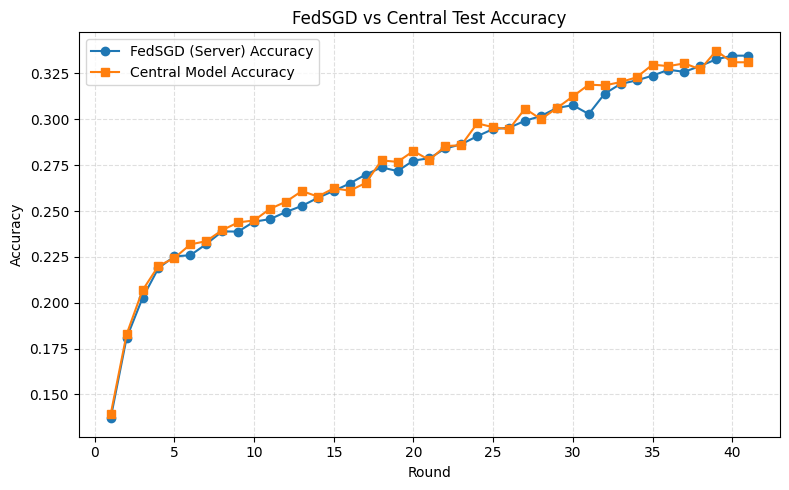

In [24]:
metrics = fed.federated_method.round_metrics

plot_fed_vs_central_acc(metrics)